# Data set loading and imports

In [61]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

path_to_data = '/datasets/tdt4265/ad/NAPLab-LiDAR/images/'
path_to_labels = '/datasets/tdt4265/ad/NAPLab-LiDAR/labels_yolo_v1.1/'

images = []
for filename in os.listdir(path_to_data):
    img = cv2.imread(os.path.join(path_to_data,filename), flags=cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)

labels = []
for filename in os.listdir(path_to_labels):
    with open(path_to_labels+filename, 'r') as f:
        for line in f.readlines():
            # Split the line by whitespace characters
            values = line.strip().split()
            
            # Check if there are enough values (should be 5 for YOLOv1.1)
            if len(values) != 5:
                raise ValueError(f"Invalid label format in file {filename}")
            
            # Convert values to appropriate data types
            class_id = int(values[0])
            x_center = float(values[1])
            y_center = float(values[2])
            width = float(values[3])
            height = float(values[4])
            # Create a dictionary for the bounding box information
            label = {
                "class_id": class_id,
                "x_center": x_center,
                "y_center": y_center,
                "width": width,
                "height": height
            }
            labels.append(label)

label2name = ['car', 'truck', 'bus', 'motorcycle', 'bicycle' ,'scooter', 'person', 'rider']

Image shape:  (128, 1024)


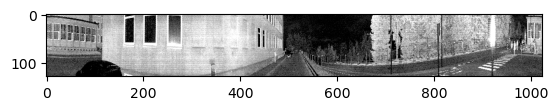

In [46]:
%matplotlib inline
print("Image shape: ", images[0].shape)
plt.imshow(images[0], cmap='gray')

plt.show()

# General Dataset Statistics

Mean:  119.88819196806179
Standard deviation:  75.7521306360107
Range:  0 255
Width:  1024
Height:  128


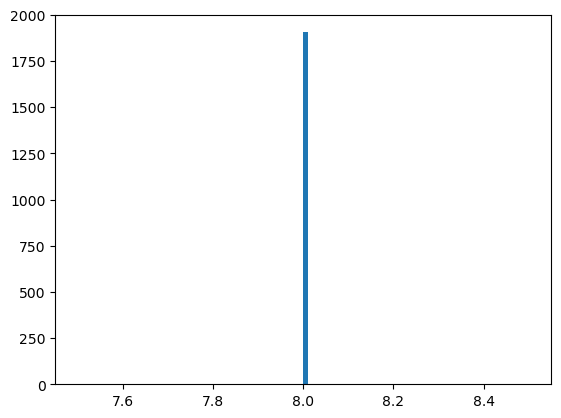

In [68]:
# Mean
mean = np.mean(images, axis=(0,1,2))
print("Mean: ", mean)

# Standard
std = np.std(images, axis=(0,1,2))
print("Standard deviation: ", std)

# Min and max values
min_val = np.min(images)
max_val = np.max(images)
print("Range: ", min_val, max_val)

# Aspect ratios
image_width = images[0].shape[1]
image_height = images[0].shape[0]
print("Width: ", image_width)
print("Height: ", image_height)

aspect_ratios = []
for img in images:
    aspect_ratios.append(img.shape[1]/img.shape[0])
aspect_ratios = np.array(aspect_ratios)

plt.hist(aspect_ratios, bins=100)
plt.show()




# Distribution of classes in dataset

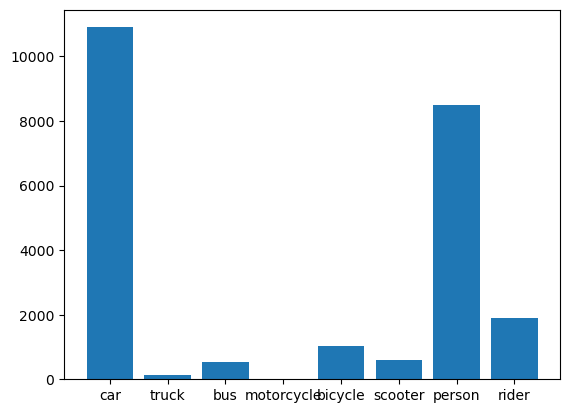

In [63]:
class_ids = [label["class_id"] for label in labels]

distribution = np.bincount(class_ids)

plt.bar(range(len(distribution)), distribution)
plt.xticks(range(len(distribution)), label2name)
plt.show()

# Bounding Box Area

Max bounding:  51046.383616
Min bounding:  9.990979190784001
Mean bounding:  749.4482661649882
Median bounding:  282.428526559232
Standard deviation:  2104.0995411016943


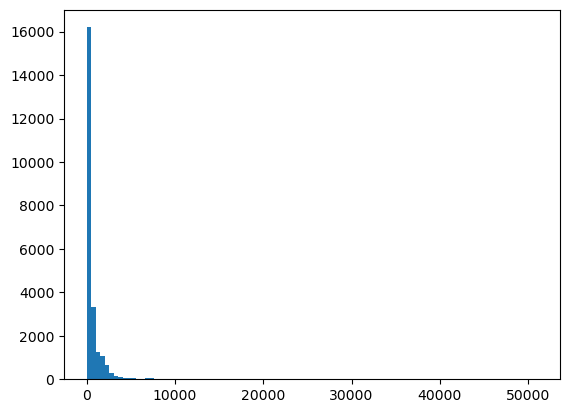

[0.9825 0.0122 0.002  0.0007 0.0008 0.0006 0.0002 0.0002 0.0003 0.0004]
[    9.991   5113.6302 10217.2695 15320.9088 20424.548  25528.1873
 30631.8266 35735.4658 40839.1051 45942.7444 51046.3836]
Image area:  131072
[0.0001 0.039  0.078  0.1169 0.1558 0.1948 0.2337 0.2726 0.3116 0.3505
 0.3895]


In [109]:
bbarea = []

for label in labels:
    bbarea.append(label["width"]*label["height"] * image_width * image_height)

max_bbarea = np.max(bbarea)
min_bbarea = np.min(bbarea)
mean_bbarea = np.mean(bbarea)
median_bbarea = np.median(bbarea)
std_bbarea = np.std(bbarea)

print("Max bounding: ", max_bbarea)
print("Min bounding: ", min_bbarea)
print("Mean bounding: ", mean_bbarea)
print("Median bounding: ", median_bbarea)
print("Standard deviation: ", std_bbarea)

plt.hist(bbarea, bins=100)
plt.show()

histogram, bin_edges = np.histogram(bbarea, bins=10)
histogram = histogram / np.sum(histogram)
np.set_printoptions(suppress=True, precision=4)
print(histogram)
print(bin_edges)

print("Image area: ", image_width * image_height)

relative_bin_edges = bin_edges / (image_width * image_height)
print(relative_bin_edges)


# Bounding Box Aspect Ratio

Max bounding:  11.426960636262963
Min bounding:  0.08970891740724066
Mean bounding:  0.7056325293308346
Median bounding:  0.5441222792454271
Standard deviation:  0.6400863168548028


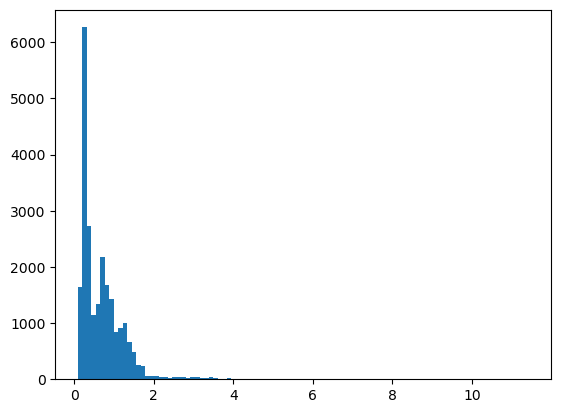

Most dominant aspect ratio: range 0.2030814345957979 to 0.3164539517843551


In [110]:
bb_aspect = []
for label in labels:
    bb_aspect.append(label["width"]/label["height"]*image_width/image_height)
    
max_bb_aspect = np.max(bb_aspect) 
min_bb_aspect = np.min(bb_aspect)
mean_bb_aspect = np.mean(bb_aspect)
median_bb_aspect = np.median(bb_aspect)
std_bb_aspect = np.std(bb_aspect)

print("Max bounding: ", max_bb_aspect)
print("Min bounding: ", min_bb_aspect)
print("Mean bounding: ", mean_bb_aspect)
print("Median bounding: ", median_bb_aspect)
print("Standard deviation: ", std_bb_aspect)

plt.hist(bb_aspect, bins=100)
plt.show()

histogram, bin_edges = np.histogram(bb_aspect, bins=100)
histogram = histogram / np.sum(histogram)
np.set_printoptions(suppress=True, precision=6)

dominant_aspect = np.argmax(histogram)
print("Most dominant aspect ratio: range", bin_edges[dominant_aspect], "to", bin_edges[dominant_aspect+1])

# Mean and Std Aspect Ration by class

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


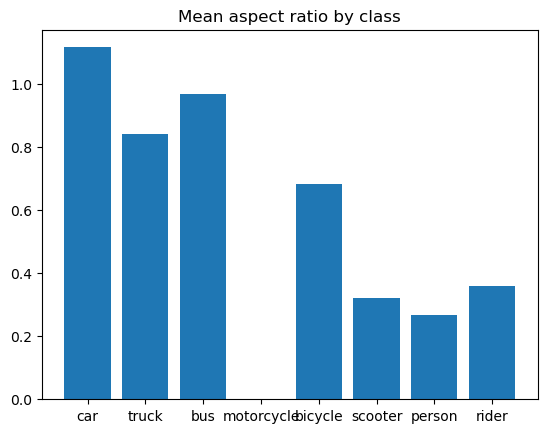

/usr/lib/python3/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/lib/python3/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


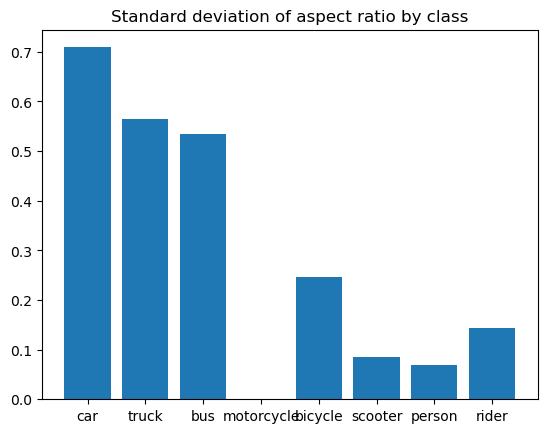

In [115]:
aspect_ratios_by_class = {class_id: [] for class_id in range(8)}

for label in labels:
    aspect_ratio = label["width"]/label["height"]*image_width/image_height
    aspect_ratios_by_class[label["class_id"]].append(aspect_ratio)
    
mean_aspect_ratios_by_class = [np.mean(aspect_ratios_by_class[class_id]) for class_id in range(8)]

plt.bar(range(8), mean_aspect_ratios_by_class)
plt.title("Mean aspect ratio by class")
plt.xticks(range(8), label2name)
plt.show()

std_aspect_ratios_by_class = [np.std(aspect_ratios_by_class[class_id]) for class_id in range(8)]

plt.bar(range(8), std_aspect_ratios_by_class)
plt.title("Standard deviation of aspect ratio by class")
plt.xticks(range(8), label2name)
plt.show()

